<a href="https://colab.research.google.com/github/Jai14/FYP/blob/main/Copy_of_fyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imgs = r'/content/drive/MyDrive/data_cloud/train'

In [ ]:
import os

# Use os.listdir to get the list of files and directories in the specified path
contents = os.listdir(imgs)

# Print the contents
for item in contents:
    print(item)

YES
NO


In [ ]:
import random
import shutil


# train image dir
train_imgs_dir = r'/content/drive/MyDrive/data_cloud/train/'

# Number of images to pick from each subfolder
num_images_to_train_test = 900

# Get the list of subfolders in the main directory
subfolders = [f.path for f in os.scandir(train_imgs_dir) if f.is_dir()]
print(subfolders)

['/content/drive/MyDrive/data_cloud/train/YES', '/content/drive/MyDrive/data_cloud/train/NO']


In [ ]:
yes_subfolder = subfolders[0]
yes_subfolder

'/content/drive/MyDrive/data_cloud/train/YES'

In [ ]:
yes_subfolder_subfolder = [f.path for f in os.scandir(yes_subfolder) if f.is_dir()]
yes_subfolder_subfolder

['/content/drive/MyDrive/data_cloud/train/YES/c0']

In [ ]:
no_subfolder=subfolders[1]
no_subfolder

'/content/drive/MyDrive/data_cloud/train/NO'

In [ ]:
no_subfolder_subfolder = [f.path for f in os.scandir(no_subfolder) if f.is_dir()]
no_subfolder_subfolder

['/content/drive/MyDrive/data_cloud/train/NO/c9',
 '/content/drive/MyDrive/data_cloud/train/NO/c8',
 '/content/drive/MyDrive/data_cloud/train/NO/c6',
 '/content/drive/MyDrive/data_cloud/train/NO/c7',
 '/content/drive/MyDrive/data_cloud/train/NO/c5',
 '/content/drive/MyDrive/data_cloud/train/NO/c1',
 '/content/drive/MyDrive/data_cloud/train/NO/c2',
 '/content/drive/MyDrive/data_cloud/train/NO/c4',
 '/content/drive/MyDrive/data_cloud/train/NO/c3']

In [ ]:
images_yes = [f.path for f in os.scandir(yes_subfolder_subfolder[0]) if f.is_file() and f.name.endswith(('.jpg'))]

In [ ]:
print(images_yes[:5])

['/content/drive/MyDrive/data_cloud/train/YES/c0/img_100026.jpg', '/content/drive/MyDrive/data_cloud/train/YES/c0/img_10003.jpg', '/content/drive/MyDrive/data_cloud/train/YES/c0/img_100050.jpg', '/content/drive/MyDrive/data_cloud/train/YES/c0/img_100074.jpg', '/content/drive/MyDrive/data_cloud/train/YES/c0/img_10012.jpg']


In [ ]:
image_no=[]

In [ ]:
# Iterate through each directory
for directory in no_subfolder_subfolder:
    # Iterate through each file in the directory
    for entry in os.scandir(directory):
        if entry.is_file() and entry.name.endswith('.jpg'):
            # Append the path of the image file to the list
            image_no.append(entry.path)

In [ ]:
print(image_no[:5])

['/content/drive/MyDrive/data_cloud/train/NO/c9/img_1640.jpg', '/content/drive/MyDrive/data_cloud/train/NO/c9/img_144.jpg', '/content/drive/MyDrive/data_cloud/train/NO/c9/img_1254.jpg', '/content/drive/MyDrive/data_cloud/train/NO/c9/img_1442.jpg', '/content/drive/MyDrive/data_cloud/train/NO/c9/img_1922.jpg']


In [ ]:
#### YES

In [ ]:
# Pick the specified number of images
selected_images_train = random.sample(images_yes, num_images_to_train_test)

# make destination directory
destination_dir_train = r'/content/drive/MyDrive/data_cloud/train/train_set'

# Remove existing directories and create new ones
shutil.rmtree(destination_dir_train, ignore_errors=True)
os.makedirs(destination_dir_train)

for image_path in selected_images_train:
    # Create the destination subfolder structure in the destination directory
    relative_path = os.path.relpath(image_path, imgs)
    relative_path = relative_path.replace("/c0","")
    destination_path = os.path.join(destination_dir_train, relative_path)
    os.makedirs(os.path.dirname(destination_path), exist_ok=True)
    # Copy the image
    shutil.copyfile(image_path, destination_path)

print(f"{num_images_to_train_test} images from each subfolder have been copied to {destination_dir_train}.")

900 images from each subfolder have been copied to /content/drive/MyDrive/data_cloud/train/train_set.


In [ ]:
#### NO

In [ ]:
for folder in no_subfolder_subfolder:

    images = [f.path for f in os.scandir(folder) if f.is_file() and f.name.endswith(('.jpg'))]
    # print(images[:3])
    # Pick the specified number of images
    selected_images_train = random.sample(images, int(num_images_to_train_test / 9))

    # make destination directory
    destination_dir_train = r'/content/drive/MyDrive/data_cloud/train/train_set'

    os.makedirs(destination_dir_train,exist_ok=True)

    for image_path in selected_images_train:
        # Create the destination subfolder structure in the destination directory
        relative_path = os.path.relpath(image_path, imgs)

         # Define the list of 'cX' values to replace
        c_values_to_replace = [f'/c{i}' for i in range(10)]

        # Remove 'cX' values from the relative_path
        for c_value in c_values_to_replace:
            relative_path = relative_path.replace(c_value, '')

        destination_path = os.path.join(destination_dir_train, relative_path)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        # Copy the image
        shutil.copyfile(image_path, destination_path)

    print(f"{int(num_images_to_train_test / 9)} images from  {folder} have been copied to {destination_dir_train}.")

100 images from  /content/drive/MyDrive/data_cloud/train/NO/c9 have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
100 images from  /content/drive/MyDrive/data_cloud/train/NO/c8 have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
100 images from  /content/drive/MyDrive/data_cloud/train/NO/c6 have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
100 images from  /content/drive/MyDrive/data_cloud/train/NO/c7 have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
100 images from  /content/drive/MyDrive/data_cloud/train/NO/c5 have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
100 images from  /content/drive/MyDrive/data_cloud/train/NO/c1 have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
100 images from  /content/drive/MyDrive/data_cloud/train/NO/c2 have been copied to /content/drive/MyDrive/data_cloud/train/train_set.
100 images from  /content/drive/MyDrive/data_cloud/train/NO/c4

In [ ]:
# Define the directory path
directory = '/content/drive/MyDrive/data_cloud/train/train_set'

# Function to recursively find image files in subfolders
def find_images(directory):
    image_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Check if the file has an image extension
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_files.append(os.path.join(root, file))
    return image_files

# Find all image files in subfolders
all_image_paths = find_images(directory)

# Print the paths of all image files found
print("Image files found:")
for image_file in all_image_paths:
    print(image_file)

Image files found:
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_40209.jpg
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_71483.jpg
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_89077.jpg
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_28465.jpg
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_16575.jpg
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_87270.jpg
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_30060.jpg
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_87811.jpg
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_18391.jpg
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_54857.jpg
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_7031.jpg
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_9724.jpg
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_25535.jpg
/content/drive/MyDrive/data_cloud/train/train_set/YES/img_3739.jpg
/content/drive/MyDrive/data_clou

In [ ]:
import torch
from pprint import pprint

# Check if GPU is available
if torch.cuda.is_available():
    # Get the number of available GPUs
    num_gpus = torch.cuda.device_count()

    print(f"Number of available GPUs: {num_gpus}")

    # Print information about each GPU
    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

    # Check if PyTorch is currently using GPU
    current_device = torch.cuda.current_device()
    print(f"\nPyTorch is currently using GPU: {torch.cuda.get_device_name(current_device)}")
else:
    print("No GPU available. PyTorch is using CPU.")

No GPU available. PyTorch is using CPU.


In [ ]:
all_image_paths_sorted = sorted(all_image_paths)

In [ ]:
pprint(all_image_paths_sorted[0])

'/content/drive/MyDrive/data_cloud/train/train_set/NO/img_100021.jpg'


In [ ]:
train_y = [path.split('/')[-2] for path in all_image_paths_sorted]

In [ ]:
train_x = all_image_paths_sorted

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=5, stratify=train_y)

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [ ]:
transforms = A.Compose(
    [
        A.Resize(height=300, width=300), # Resize to 300x300"
        A.ToFloat(),
        ToTensorV2(),
    ]
)

In [ ]:
pprint(train_x)

['/content/drive/MyDrive/data_cloud/train/train_set/NO/img_20185.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/NO/img_71634.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_81052.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_12712.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_60985.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/NO/img_86443.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_50804.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/NO/img_16270.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/NO/img_859.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/NO/img_96775.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/NO/img_63556.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_42336.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_63812.jpg',
 '/content/drive/MyDrive/data_cloud/train/train_set/YES/img_23578.jpg',
 

In [ ]:
pprint(train_y)

['NO',
 'NO',
 'YES',
 'YES',
 'YES',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'NO',
 'NO',
 'YES',
 'NO',
 'YES',
 'NO',
 'YES',
 'YES',
 'NO',
 'NO',
 'YES',
 'NO',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'YES',
 'NO',
 'NO',
 'YES',
 'YES',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'YES',
 'YES',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'YES',
 'NO',
 'YES',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'YES',
 'NO',
 'NO',
 'YES',
 'NO',
 'YES',
 'YES',
 'NO',
 'YES',
 'YES',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'YES',
 'YES',
 'YES',
 'NO',
 'NO',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'NO',
 'YES',
 'YES',
 'NO',
 'YES',
 'YES',
 'YES',
 'NO',
 'YES',
 'YES',
 'NO',
 'NO',
 'YES',
 'YES',
 'NO',
 'NO',
 'YES',
 'YES',
 'NO',
 'YES',
 'NO',
 'NO',
 'NO',
 'YES',
 'YES',
 'YES',
 'YES',
 'NO',
 'YES',
 'NO',
 'YES',
 'YES',
 'YES',
 'NO'

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels
encoded_labels_train = label_encoder.fit_transform(train_y)
tensor_encoded_labels_train = torch.tensor(encoded_labels_train)
pprint(tensor_encoded_labels_train)


# Fit label encoder and transform labels
encoded_labels_test = label_encoder.fit_transform(test_y)
tensor_encoded_labels_test = torch.tensor(encoded_labels_test)
pprint(tensor_encoded_labels_test)


tensor([0, 0, 1,  ..., 0, 0, 0])
tensor([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       

In [ ]:
import cv2
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor

In [ ]:
class image_Dataset(Dataset):
    def __init__(self, image_paths, tensor_encoded_labels, transform=None):
        """
        Args:
            image_paths (list): List of file paths to images.
            labels (list): List of labels corresponding to the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.image_paths = image_paths
        self.labels = tensor_encoded_labels
        self.transform = transform


    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_filepath = self.image_paths[idx]
        image = cv2.imread(image_filepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if self.transform is not None and callable(self.transform):
            image = self.transform(image=image)["image"]

        # Convert label to PyTorch tensor
        label = self.labels[idx]

        return image, label

In [ ]:
#######################################################
#                  Create Dataset
#######################################################

train_dataset = image_Dataset(train_x,tensor_encoded_labels_train,transforms)
test_dataset = image_Dataset(test_x,tensor_encoded_labels_test,transforms)

In [ ]:
#######################################################
#                  load Dataset
#######################################################

train_loader = DataLoader(train_dataset, batch_size=12, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=True)

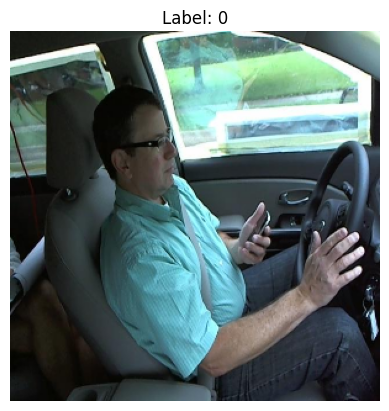

In [ ]:
import torchvision.transforms.functional as TF

for i in range(1):
  image, label = train_dataset[i]
  image = TF.to_pil_image(image)  # Convert the tensor to a PIL Image
  image = np.array(image)
  plt.imshow(image)
  plt.title(f"Label: {label}")
  plt.axis('off')  # Turn off axis
  plt.show()

In [ ]:
print('The shape of tensor for 50th image in train dataset: ',train_dataset[0][0].shape)
print('The label for 50th image in train dataset: ',train_dataset[0][1])

The shape of tensor for 50th image in train dataset:  torch.Size([3, 300, 300])
The label for 50th image in train dataset:  tensor(0)


In [ ]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

In [ ]:
class CustomAlexNet(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomAlexNet, self).__init__()
        # Load pre-trained AlexNet model
        self.alexnet = models.alexnet(weights=False)

        # Modify the fully connected layers to match your number of classes
        in_features = self.alexnet.classifier[6].in_features
        self.alexnet.classifier[6] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.alexnet(x)

In [ ]:
class ImageClassifier(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(3))
        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(3))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=128*33*33, out_features=num_classes))

    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.classifier(x)
        return x

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
model = ImageClassifier()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

In [ ]:
num_epochs = 10
model.train()

ImageClassifier(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=139392, out_features=2, bias=True)
  )
)

In [ ]:
# Assuming you have a DataLoader named 'train_loader'
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        total_loss = 0.0
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}')


Epoch [1/10], Loss: 0.0055
Epoch [2/10], Loss: 0.0040
Epoch [3/10], Loss: 0.0002
Epoch [4/10], Loss: 0.0002
Epoch [5/10], Loss: 0.0021
Epoch [6/10], Loss: 0.0008
Epoch [7/10], Loss: 0.0038
Epoch [8/10], Loss: 0.0024
Epoch [9/10], Loss: 0.0002
Epoch [10/10], Loss: 0.0004


In [ ]:
torch.save(model.state_dict(), os.path.join('/content/drive/MyDrive/data_cloud/train', 'my_neural_fyp.pth'))

In [ ]:
model.eval()

ImageClassifier(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=139392, out_features=2, bias=True)
  )
)

In [ ]:
total_correct = 0
total_samples = 0

with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass
        outputs = model(images)

        # Compute predictions
        _, predicted = torch.max(outputs, 1)

        # Update total_correct and total_samples
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

# Calculate accuracy
accuracy = 100.0 * total_correct / total_samples
print('Accuracy on the test set: {:.2f}%'.format(accuracy))

Accuracy on the test set: 93.33%


In [ ]:
print('No of total samples : {:.2f}'.format(total_samples))
print('No of correct predictions: {:.2f}'.format(total_correct))
print('No of wrong predictions: {:.2f}'.format(total_samples-total_correct))

No of total samples : 360.00
No of correct predictions: 336.00
No of wrong predictions: 24.00


# Check with image


In [ ]:
total_correct = 0
total_samples = 0

with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass
        outputs = model(images)

        # Compute predictions
        _, predicted = torch.max(outputs, 1)

        # Print the image and its output
        for i in range(len(images)):
            plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))
            plt.title(f'Predicted: {predicted[i]}, Actual: {labels[i]}')
            plt.show()

        # Update total_correct and total_samples
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

# Calculate accuracy
accuracy = 100.0 * total_correct / total_samples
print('Accuracy on the test set: {:.2f}%'.format(accuracy))